<a href="https://colab.research.google.com/github/henriquebap/Machine_Learning_HB/blob/main/PIBxACBR_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 2 - Part 01
---
### Checkpoint 2TDSG

## Integrantes do Grupo

- Henrique Baptista - RM97796

- Igor Ribeiro Anccilotto - RM550415

- Pedro Henrique Endo de Oliveira - RM551446

- Kauane Almeida Gonçalves - RM551405

- Luigi Exposito Uchiyama - RM99520
---
Exercicio de Regressão

O Produto Interno Bruto (PIB) representa a soma total de todos os bens e serviços finais produzidos em uma determinada  região,  como  uma  cidade,  estado  ou  país.  O  PIB  é  um  indicador  fundamental  para  avaliar  a atividade econômica e o desempenho global de uma economia. (fonte: Portal da Indústria).

## Objetivo


Criar um modelo de previsao usando Regressao Linear para fazer previsão do PIB com base nos atributos relacionado ao volume de trafego de veiculos no Pais, segundo o indice ABCR.

---

Link da planilha com o Indice de projecao do PIB:
- https://www.itau.com.br/itaubba-pt/analises-economicas/series-economicas

Link do indice de volume de trafego de veiculos no pais (ABCR):
- https://melhoresrodovias.org.br/indice-abcr/


### Importes

In [7]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Chamando o dataframe

In [5]:
dados = pd.read_excel('/content/JuncaodosdadosPIBeABCR.xlsx')

Tendo a primeira visualizacao dos dados

In [6]:
print(dados.head())

  Unnamed: 0   Unnamed: 1 Unnamed: 2  Unnamed: 3  Unnamed: 4
0        NaT  PIB mensal       LEVES     PESADOS       TOTAL
1 2003-01-01          100  94.199353   110.60691   97.432742
2 2003-02-01   104.514069  98.109503  108.757964  100.004467
3 2003-03-01    100.40681  92.922319  112.890167   98.306756
4 2003-04-01    100.22814  94.621354  112.651312   98.768912


#### Tratamento dos dados

In [8]:
dados.columns = ['Data','PIB_mensal','LEVES','PESADOS','TOTAL']

In [9]:
# DROP de valores vazios
dados = dados.dropna()

Visualizacao dos dados

In [12]:
print(dados.head())

        Data  PIB_mensal      LEVES     PESADOS       TOTAL
1 2003-01-01         100  94.199353   110.60691   97.432742
2 2003-02-01  104.514069  98.109503  108.757964  100.004467
3 2003-03-01   100.40681  92.922319  112.890167   98.306756
4 2003-04-01   100.22814  94.621354  112.651312   98.768912
5 2003-05-01   99.088078  94.801811  114.149891   99.308846


### Analise de Dados

PLT de um grafico Data X PIB Mensal para a avaliacao de padroes

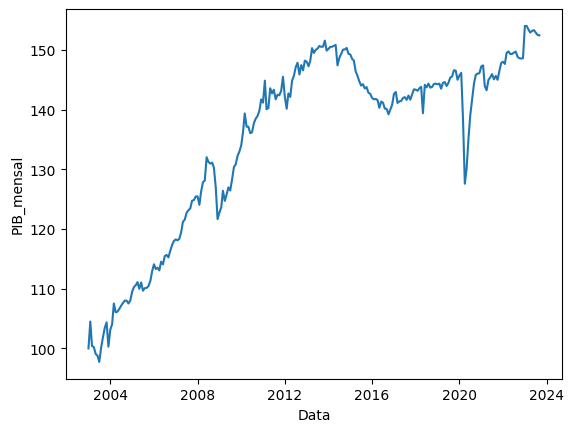

In [13]:
sns.lineplot(x='Data', y='PIB_mensal', data=dados)
plt.show()

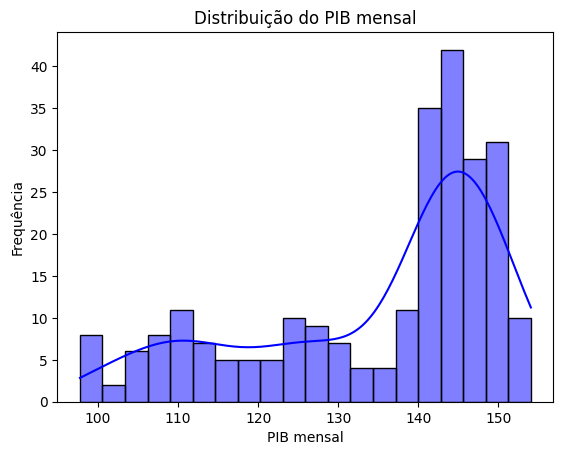

In [31]:
# Histograma e curva de densidade para PIB_mensal
sns.histplot(dados['PIB_mensal'], kde=True, color='blue', bins=20)
plt.title('Distribuição do PIB mensal')
plt.xlabel('PIB mensal')
plt.ylabel('Frequência')
plt.show()

Histograma

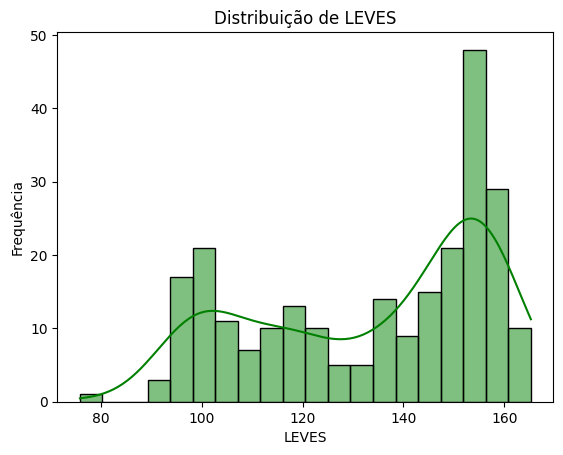

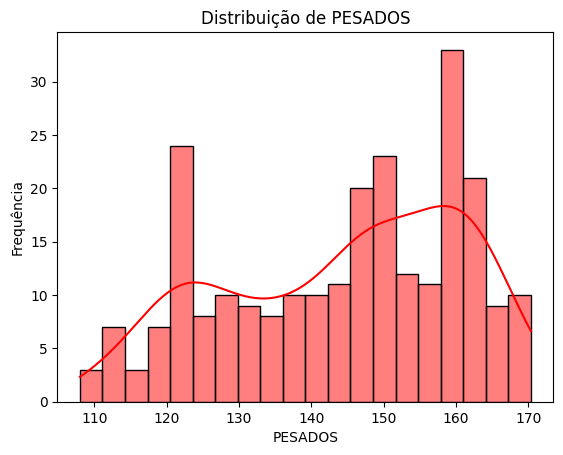

In [30]:
# Histograma e curva de densidade para LEVES
sns.histplot(dados['LEVES'], kde=True, color='green', bins=20)
plt.title('Distribuição de LEVES')
plt.xlabel('LEVES')
plt.ylabel('Frequência')
plt.show()

# Histograma e curva de densidade para PESADOS
sns.histplot(dados['PESADOS'], kde=True, color='red', bins=20)
plt.title('Distribuição de PESADOS')
plt.xlabel('PESADOS')
plt.ylabel('Frequência')
plt.show()

HeatMap para visualizar a correlacao entre os dados

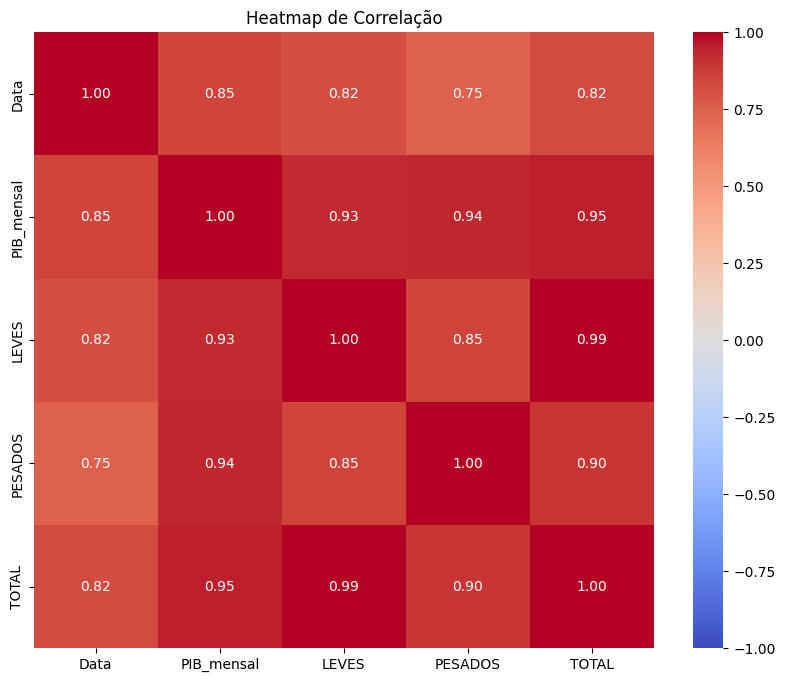

In [32]:
correlacao = dados.corr()

plt.figure(figsize=(10, 8))  # Ajuste o tamanho da figura
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# titulo
plt.title('Heatmap de Correlação')

plt.show()

### Treinamento do modelo - Linear Regression

In [18]:
X = dados[['LEVES', 'PESADOS']]
y = dados['PIB_mensal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test)

Avaliando e visualizando os valores preditos pelo modelo

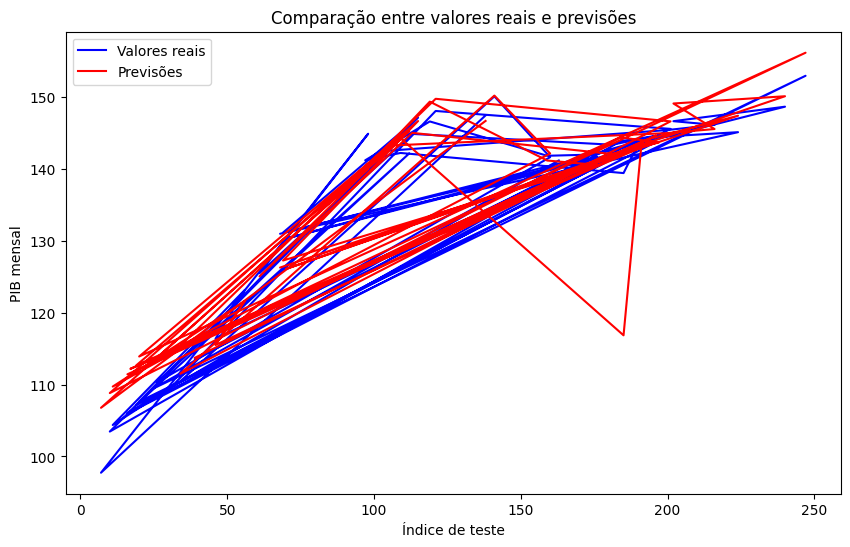

In [37]:
# Visualizar as previsões em relação aos valores reais
# Grafico de linha
plt.figure(figsize=(10, 6))

plt.plot(y_test.index, y_test, label='Valores reais', color='blue')
plt.plot(y_test.index, y_pred, label='Previsões', color='red')

plt.title('Comparação entre valores reais e previsões')
plt.xlabel('Índice de teste')
plt.ylabel('PIB mensal')
plt.legend()
plt.show()

Analise do grafico de dispersao

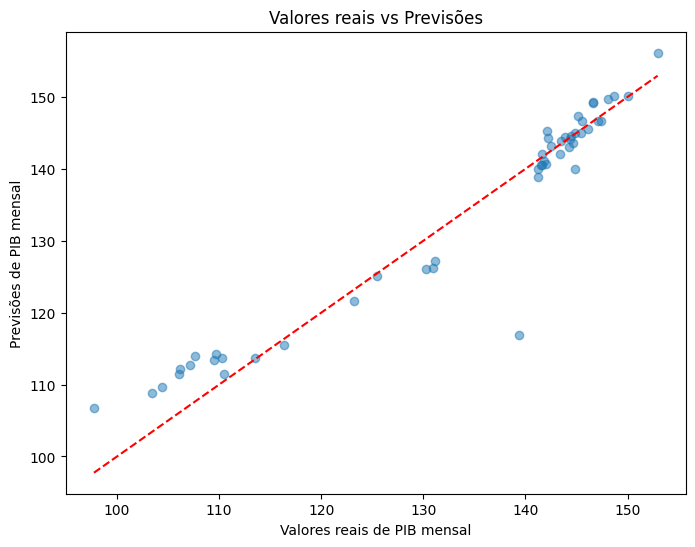

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valores reais de PIB mensal')
plt.ylabel('Previsões de PIB mensal')
plt.title('Valores reais vs Previsões')
plt.show()

Outras metricas para aviliar o modelo de regressao linear

In [38]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R²: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

R²: 0.93
RMSE: 4.43


In [23]:
print("Coeficientes do modelo:")
print(f"LEVES: {model.coef_[0]}")
print(f"PESADOS: {model.coef_[1]}")

Coeficientes do modelo:
LEVES: 0.2768660762558343
PESADOS: 0.5500518907879334
